In [1]:
from deepar import *

In [2]:
mx.random.seed(0)
np.random.seed(0)

In [3]:
filepath = 'data/cr2_qflxAmon_2018/cr2_qflxAmon_2018.txt'
df = pd.read_csv(filepath, parse_dates=True)
df = df.replace(-9999, np.nan)
df = df.replace('-9999', np.nan)
df = df.drop([i for i in range(14)])
df = df.rename(columns={"codigo_estacion": "dates"})

<AxesSubplot:xlabel='dates'>

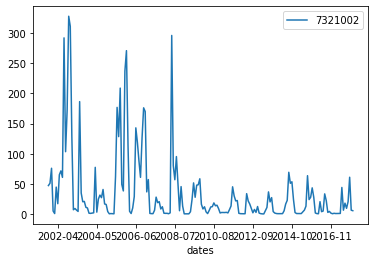

In [4]:
df1 = df[['dates', '7321002']].iloc[-240:] # 10 años hacia atrás
df1 = df1.set_index('dates')
df1 = df1.astype('float64')
df1.plot()

In [5]:
test_station = '7321002'
columns = ['dates', test_station]
df1 = get_df(df, columns, past_years=20)
model = fit(df1, columns)
predict(model, df1, test_station, plot=False)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 172.36it/s]


,DeepAR,Seasonal naive
MASE,0.270737,0.277483
MSIS,2.526314,11.099312
NSE,-0.009471,-0.144646


In [6]:
columns = ['dates', '7321002', '7300001', '7317005', '7303000', '7306001', '7317003', '7308002', '7308001', '7320003']
df2 = get_df(df, columns, past_years=20)
model = fit(df2, columns)

test_station = '7321002'
predict(model, df2, test_station, plot=False)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 118.78it/s]


,DeepAR,Seasonal naive
MASE,0.220164,0.277483
MSIS,1.472205,11.099312
NSE,0.046898,-0.144646


In [7]:
df3 = df.iloc[- 20 * 12:]
df3 = df3.set_index('dates')
df3 = df3.dropna(thresh=100, axis=1)
columns = df3.columns.values.tolist()
model = fit(df3, columns)

test_station = '7321002'
predict(model, df3, test_station, plot=False)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 237.20it/s]


,DeepAR,Seasonal naive
MASE,0.214447,0.277483
MSIS,1.251219,11.099312
NSE,0.090236,-0.144646
